In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r"C://Users//aerofit_treadmill.csv")

In [4]:
data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**BASIC OBSERVATIONS**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
data.shape

(180, 9)

**NON-GRAPHICAL ANALYSIS**

In [8]:
data.isnull().sum()/len(data)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [9]:
data["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [10]:
data["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [11]:
data["Usage"].value_counts().sort_values()

7     2
6     7
5    17
2    33
4    52
3    69
Name: Usage, dtype: int64

In [12]:
data["Fitness"].value_counts().sort_values()

1     2
4    24
2    26
5    31
3    97
Name: Fitness, dtype: int64

In [13]:
data["Gender"].value_counts().sort_values()

Female     76
Male      104
Name: Gender, dtype: int64

**UNIVARIATE ANALYSIS**

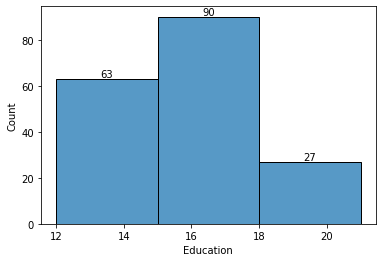

In [14]:
ax=sns.histplot(data=data["Education"],bins=[12,15,18,21])
ax.bar_label(ax.containers[0])
plt.show()

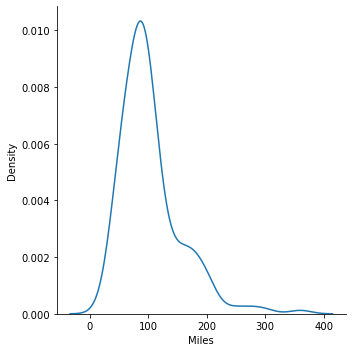

In [15]:
a=sns.displot(data=data,x=data["Miles"],kind="kde")


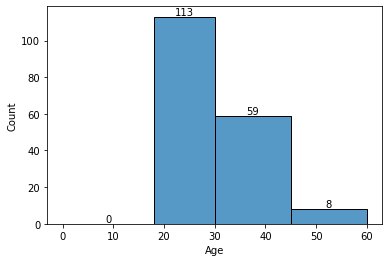

In [16]:
ax=sns.histplot(data=data["Age"],bins=[0,18,30,45,60])
ax.bar_label(ax.containers[0])
plt.show()

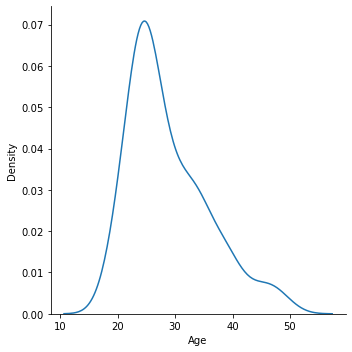

In [17]:
sns.displot(data=data,x="Age",kind="kde")

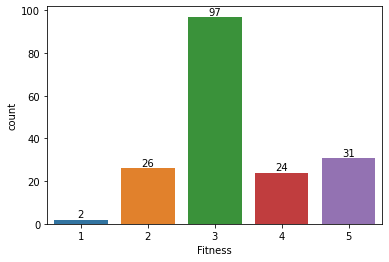

In [18]:
ax= sns.countplot(data=data,x="Fitness")
ax.bar_label(container=ax.containers[0])
plt.show()

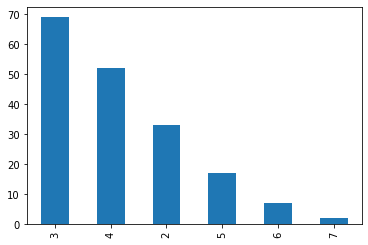

In [19]:
data["Usage"].value_counts().plot(kind="bar")
plt.show()

**BIVARIATE  & MULTIVARIATE ANALYSIS**

In [20]:
data.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

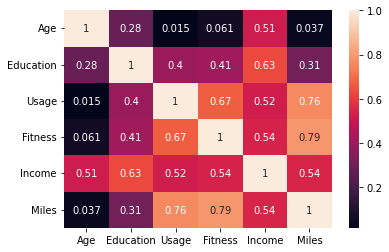

In [21]:
sns.heatmap(data.corr(), annot=True)
            

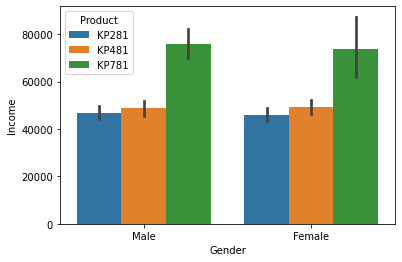

In [22]:
sns.barplot(x="Gender",y="Income",hue="Product",data=data)
plt.show()

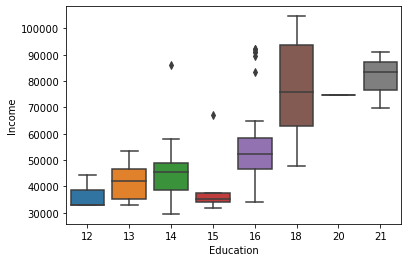

In [23]:
sns.boxplot(x="Education",y="Income",data=data)
plt.show()

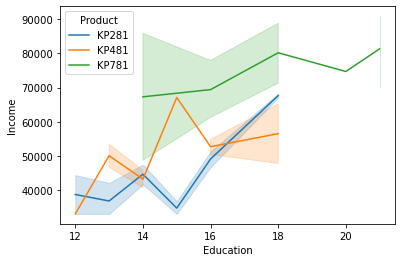

In [24]:
sns.lineplot(x="Education",y="Income",hue="Product",data=data)
plt.show()

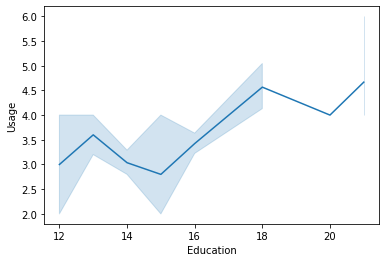

In [25]:
sns.lineplot(x="Education",y="Usage",data=data)
plt.show()

<AxesSubplot:xlabel='Usage', ylabel='Income'>

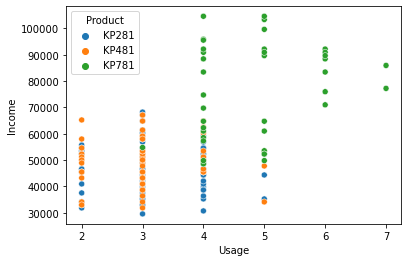

In [26]:
sns.scatterplot(x="Usage",y="Income", hue="Product",data=data)

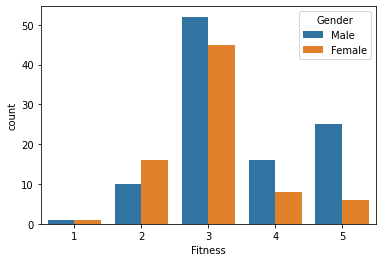

In [27]:
sns.countplot(x="Fitness",hue="Gender",data=data)
plt.show()

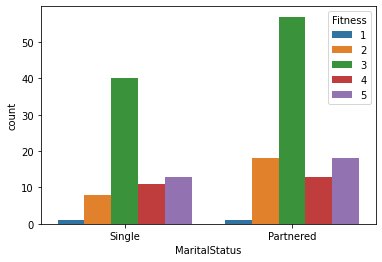

In [28]:
sns.countplot(x="MaritalStatus",hue="Fitness",data=data)
plt.show()

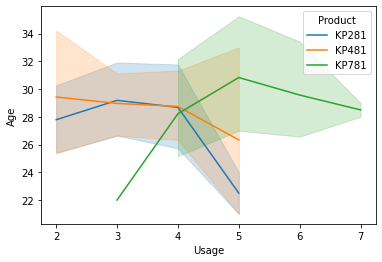

In [29]:
sns.lineplot(x="Usage",y="Age",data=data,hue="Product")
plt.show()

<AxesSubplot:xlabel='Product', ylabel='Miles'>

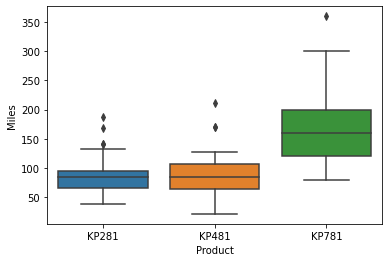

In [30]:
sns.boxplot(y="Miles",x="Product",data=data)

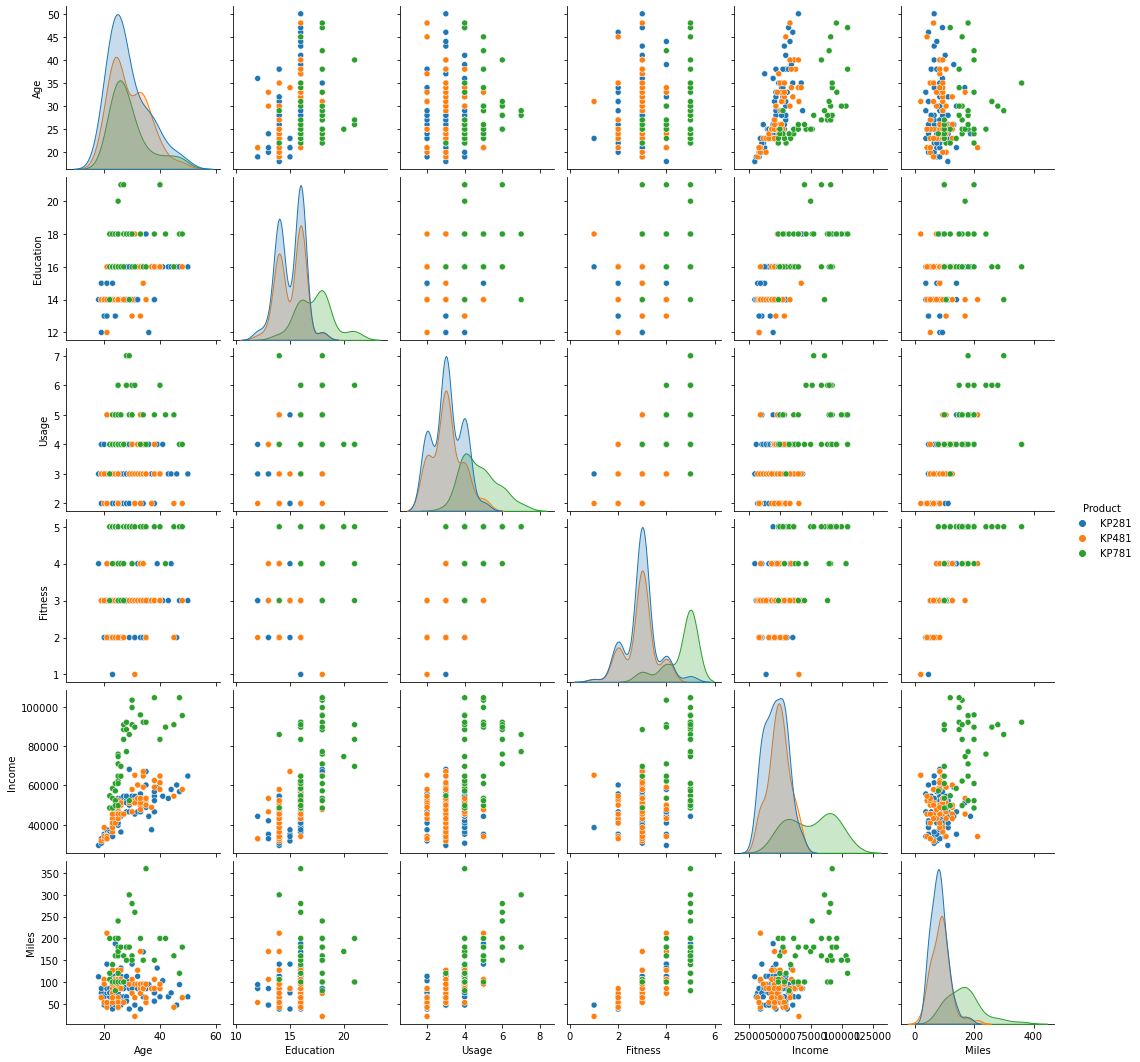

In [31]:
sns.pairplot(data=data,hue="Product")

In [32]:
data.groupby("Gender")["Product"].count()/len(data)*100

Gender
Female    42.222222
Male      57.777778
Name: Product, dtype: float64

<font size=11> <font color="Black">Prob(Gender|KP481)<font>

In [33]:
pd.crosstab(index=data["Gender"],columns=data["Product"],margins=True,normalize="columns")

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778


<font size=8> Prob(KP481|Gender)<font>

In [34]:
pd.crosstab(index=data["Gender"],columns=data["Product"],normalize="index")


Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


In [35]:
data.groupby(["Product"])[["Miles"]].sum()

,Miles
Product,
KP281,6623
KP481,5276
KP781,6676


<font size=9>**Analysis Insights**<font size>

<font size=5>#Missing Value & Outlier Related Insights<font size>

1. There are no null values .


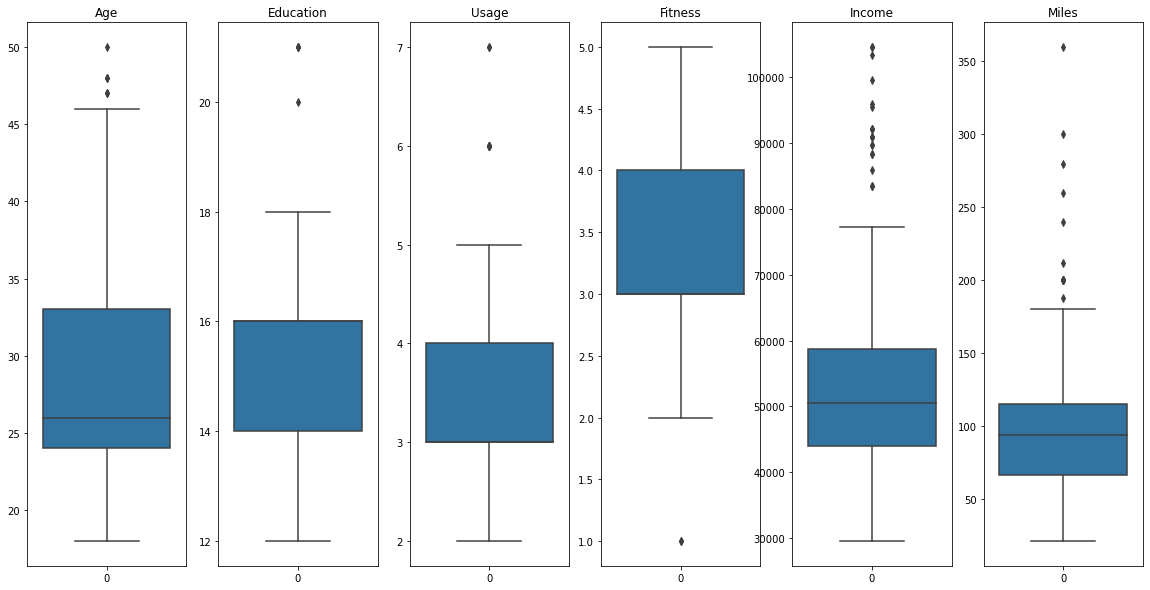

In [36]:
numeric_cols=['Age', 'Education',  'Usage',
       'Fitness', 'Income', 'Miles']
fig, axs = plt.subplots(ncols=6, figsize=(20, 10))
for i in range(len(numeric_cols)): 
    sns.boxplot(data=data[numeric_cols[i]], ax=axs[i]).set(title=numeric_cols[i])

plt.show()

<font size=5>#Age Related Insights<font size>

1. Age has strong +ve correlation with Income levels 
2. Age has low +ve correlation with Education Levels
3. Age has negligible correlation with **Usage, Fitness, Miles**

<font size=5>#Gender,Product & Income Related Insights<font size>

1. It is clearly visible in both the genders as income rises people with greater mean income , i.e  greater than 40k tend to go for better products  

<font size=5>#Education & Income  Related Insights<font size>

1. people with  more education have higher mean level of income 

<font size=5>#MaritalStatus & Fitness Related Insights<font size>

1. We can clearly see that in all the categories(except 1): there are greater number of married people who are fit .

<font size=5>#Usage,Income & Product Related Insights<font size>

1. We can see that people with more Usage are the ones with higher income .
2. Myabe we can infer that those with higher income are more health conscious .
3. Also we can see that more the usage more is the demand for the better product i.e. tending towards  KP|781 .

<font size=5>#Usage & Age Related Insights<font size>

1. there is negligible correlation b/w age and usage, 
2. **BUT** we can see that b/w age 30-32 , the usage is limited to 5 times .
3. The most active age group is b/w 26 - 30 , with an average of 4-5 times .

<font size=5>#Gender  & Fitness Related Insights<font size>

1. we can see that in both the genders , the distribtuion is more centered towards fitness lvels of 3.
2. count of Male category is more in <font size=3>**almost**<font size> all levels of fitness .

<font size=5>#Education Income & Product Related Insights<font size>

1. It is visible that as education increases income levels increases and so does the demand for the better product -
    * as between 12 and 14 years of Education , the income levels are low , therefore the demand for KP281 is there,
    * as we move to 14 anad 16 years of Education , the income levels further rise ,the demand for KP 281 takes a dip 
        and Demand for KP 481 rises
    * as Education further rises ,the demand , along with income , the Demand for KP 281 vanishes , Demand for KP 481 slows down 
        Demand for KP 781 takes a boost 

<font size=5>#Miles & Product  Related Insights<font size>

1. It is visible that people as people walk more miles, they opt fot the better product  i.e gradually going from KP281 > KP481 > KP781. 

<font size=9>**Recommendations**<font size>

1. Target the people with more income better products and people with low income less expensive products !!
2. Market a camapign of the benfits of fitness and walking , as more the people walk on an avergae more they tend to go for the better product .
3. To cater and maximize the sales for each product , 
        a. target KP281 to young people and teens with education years b/w 12-14
        b. target KP481 to people with education years b/w 14-16
        c. target KP781 to people with education years of 18 above .
4. As we can see that male category is on avergae more fit, we can nudge competitions b/w both the genders which will boost demand for our products in all the categories .
5. We should target people with more income , and offer them discounts, as they are usually influential and more fitness conscious:-
        A. ALSO NOT TO FORGET , THEY WILL PUBLICIZE THE BRAND  BY MOUTH OF WORD, ALSO THE RESULTS WOULD BE VISIBLE !!( AS
        ACTIONS SPEAK LOUDER THAN WORDS )
        
6. Target the products in the age group of 26-30, since they are the most active age hroup and 
    they have an average use of 4-5 times .
7. If the customer is married , there are more chances of him being fit, so in married age group b/w 26-30 years of age , where 
    is a perfect target to engage .
